# Reconocimiento de imagenes utilizando SVM

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces() 
faces.DESCR

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/aulae1/scikit_learn_data


'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [3]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
faces.images.shape

(400, 64, 64)

In [5]:
print(faces.target.shape)

(400,)


In [6]:
print(faces.data.shape)

(400, 4096)


In [7]:
def print_faces(images, target,top_n):
    fig = plt.figure(figsize = (12,12)) # configurar el tamaño de la figura en pulgadas
    fig.subplots_adjust(left=0, right=1, bottom=0,top=1, hspace=0.05,wspace=0.05) #cuanto queremos de ESpacios en balnco entre las imagenes
    #Plotea el numero de imagenes que el usuario pida
    for i in range(top_n): 
        #Visualizar imagenes en matriz de 20x20
        p = fig.add_subplot(15,15,i+1,xticks=[], yticks=[]) #Tamaño de la imagenes
        p.imshow(images[i],cmap=plt.cm.bone)
        
        #Incluir etiqueta objetivo en la imagen
        p.text(1,18,str(target[i]),color='blue')  #Agregue el texto s a los ejes en la ubicación x, y en coordenadas de datos
        p.text(1,60,str(i),color='red')

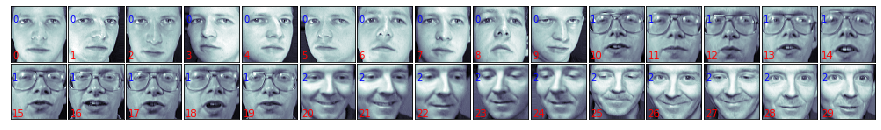

In [8]:
print_faces(faces.images, faces.target, 30)

In [9]:
np.max(faces.data)

1.0

In [10]:
np.min(faces.data)

0.0

In [11]:
np.mean(faces.data)

0.5470426

Separación del dataset en un conjunto de entrenamiento y de prueba

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=0)

In [13]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
from sklearn.model_selection import cross_validate
from scipy.stats import sem
from sklearn.model_selection import cross_val_score
#cv_results = cross_validate(lasso, X, y, cv=3,return_train_score=False)

In [15]:
scores = cross_val_score(svc, X_train, y_train, cv=5)
print(scores)

/home/aulae1/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.96875  0.96875  0.921875 0.96875  0.953125]


In [16]:
print(np.mean(scores))

0.95625


Precisión

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = svc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred)
print('Precisión en el conjunto de entrenamiento: {}'.format(train_accuracy))
y_pred = svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Precisión en el conjunto de prueba: {}'.format(test_accuracy))

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 0.9875


Matriz de confusión

In [18]:
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True))

Predicted  0  1  2  3  4  5  6  7  9  10  ...  30  31  32  33  34  35  36  37  \
True                                      ...                                   
0          5  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   
1          0  4  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   
2          0  0  2  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   
3          0  0  0  1  0  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   
4          0  0  0  0  1  0  0  0  0   0  ...   0   0   0   0   0   0   0   0   
5          0  0  0  0  0  3  0  0  0   0  ...   0   0   0   0   0   0   0   0   
6          0  0  0  0  0  0  3  0  0   0  ...   0   0   0   0   0   0   0   0   
7          1  0  0  0  0  0  0  2  0   0  ...   0   0   0   0   0   0   0   0   
9          0  0  0  0  0  0  0  0  1   0  ...   0   0   0   0   0   0   0   0   
10         0  0  0  0  0  0  0  0  0   3  ...   0   0   0   0   0   0   0   0   
11         0  0  0  0  0  0 

Reporte de clasificación

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         3
          20       1.00    

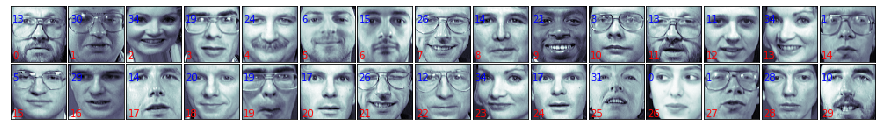

In [20]:
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]  #reshape the data from arrays to 64 x 64 matrices:
print_faces(eval_faces,y_pred,30)

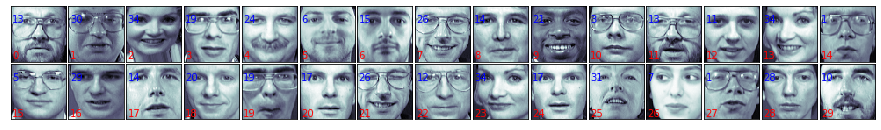

In [21]:
print_faces(eval_faces,y_test,30)